# Creating A Model of Diabetes Dataset
Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

# Reading the Diabetes Dataset

In [4]:
df = pd.read_csv('diabete.csv')

In [5]:
print(df.shape)

(768, 9)


In [6]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [7]:
df.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive
767,1,93,70,31,0,30.4,0.315,23,tested_negative


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# Train Test Split
Let's split up the data into training set and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('class',axis = 1)
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

# Decision Trees
We'll start just by training a single decision tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation for Decision Trees
Let's evaluate our decision tree

In [15]:
predTree = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print(classification_report(y_test,predTree))

                 precision    recall  f1-score   support

tested_negative       0.82      0.80      0.81       157
tested_positive       0.59      0.62      0.61        74

       accuracy                           0.74       231
      macro avg       0.70      0.71      0.71       231
   weighted avg       0.74      0.74      0.74       231



In [18]:
print(confusion_matrix(y_test,predTree))

[[125  32]
 [ 28  46]]


In [19]:
print(accuracy_score(y_test,predTree)*100)

74.02597402597402


In [20]:
a = pd.DataFrame(confusion_matrix(y_test,predTree),index='Positive Negative'.split(), columns='Positive Negative'.split())

In [21]:
plt.figure(figsize = (5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

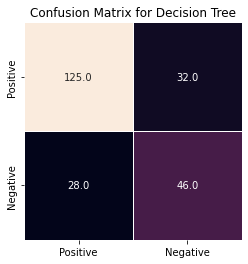

In [22]:
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for Decision Tree')

# Random Forest
We'll start training the model with Random forest Machine learning algorithm

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators = 100)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
rfc.predict([[2,300,0,0,45.2,2.1,55,45]])

array(['tested_negative'], dtype=object)

In [28]:
rfc.predict([[0,60,4,5,45.2,2.1,35,28]])

array(['tested_negative'], dtype=object)

# Prediction and Evaluation for Random Forest
Let's evaluate our random forest 

In [29]:
print(classification_report(y_test,rfc_pred))

                 precision    recall  f1-score   support

tested_negative       0.80      0.89      0.84       157
tested_positive       0.70      0.53      0.60        74

       accuracy                           0.77       231
      macro avg       0.75      0.71      0.72       231
   weighted avg       0.77      0.77      0.77       231



In [30]:
print(accuracy_score(y_test,rfc_pred)*100)

77.48917748917748


In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[140  17]
 [ 35  39]]


In [32]:
a = pd.DataFrame(confusion_matrix(y_test,rfc_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())

In [33]:
plt.figure(figsize = (5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

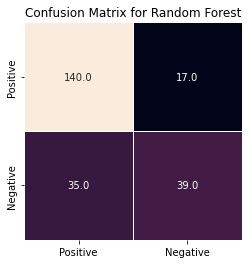

In [34]:
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for Random Forest')

In [35]:
#pkl_filename = 'random_model.pkl'
#pickle.dump(rfc, open(pkl_filename, 'wb'))

# SVM
Let's start training models with SVM ML techniques

In [36]:
from sklearn import svm

In [37]:
svm_classifier = svm.SVC()

In [38]:
svm_classifier.fit(X_train,y_train)

SVC()

In [39]:
svm_pred = svm_classifier.predict(X_test)

# Prediction and Evaluation for SVM
Let's evaluate our SVM 

In [40]:
print(classification_report(y_test,svm_pred))

                 precision    recall  f1-score   support

tested_negative       0.77      0.90      0.83       157
tested_positive       0.68      0.43      0.53        74

       accuracy                           0.75       231
      macro avg       0.73      0.67      0.68       231
   weighted avg       0.74      0.75      0.74       231



In [41]:
print(accuracy_score(y_test,svm_pred)*100)

75.32467532467533


In [42]:
print(confusion_matrix(y_test,svm_pred))

[[142  15]
 [ 42  32]]


Text(0.5, 1.0, 'Confusion Matrix for SVM')

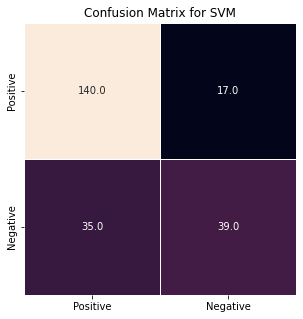

In [43]:
a = pd.DataFrame(confusion_matrix(y_test,rfc_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())
plt.figure(figsize = (5,5))
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for SVM')

# KNN
Let's start training models with KNN ML techniques

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [46]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
KNN_pred = KNN.predict(X_test)

# Prediction and Evaluation for KNN
Let's evaluate our KNN classification_report, confusion_matrix, accuracy_score

In [48]:
print(classification_report(y_test,KNN_pred))

                 precision    recall  f1-score   support

tested_negative       0.79      0.85      0.82       157
tested_positive       0.63      0.53      0.57        74

       accuracy                           0.75       231
      macro avg       0.71      0.69      0.70       231
   weighted avg       0.74      0.75      0.74       231



In [49]:
print(accuracy_score(y_test,KNN_pred)*100)

74.89177489177489


In [50]:
print(confusion_matrix(y_test,KNN_pred))

[[134  23]
 [ 35  39]]


Text(0.5, 1.0, 'Confusion Matrix for KNN')

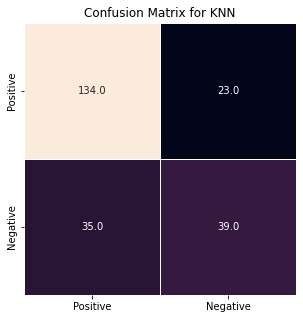

In [51]:
a = pd.DataFrame(confusion_matrix(y_test,KNN_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())
plt.figure(figsize = (5,5))
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for KNN')